In [10]:
import dagstermill
import numpy as np
import pandas as pd
from hooli_data_eng.utils import _random_times
from hooli_data_eng.assets.forecasting import model_func
# import plotly.express as px
from plotnine import ggplot, geom_point, stat_smooth, aes

In [3]:
# for local testing we use sample data, this will be replaced at runtime by the dagster asset
daily_order_summary = pd.DataFrame({
    "order_date": _random_times(100),
    "num_orders":  np.random.normal(10, 5, 100)
})
# this will be replaced by the trained model parameters
order_forecast_model = tuple([5,5])

/var/folders/m0/ncdbk92x71ld44fcg6cc3t6r0000gn/T/ipykernel_56560/2553639382.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


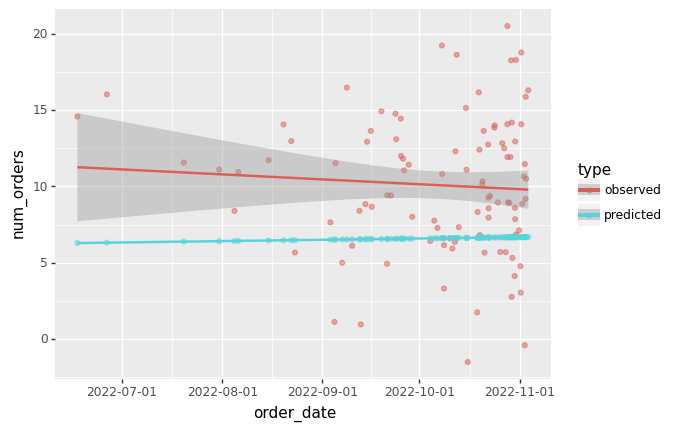

<ggplot: (711527286)>

In [12]:
# generate predictions for the true data
a, b = order_forecast_model

daily_order_preds = pd.DataFrame({
    'order_date': daily_order_summary['order_date'],
    'num_orders': model_func(daily_order_summary['order_date'].astype(np.int64), a, b)
})
daily_order_summary['type'] = 'observed'
daily_order_preds['type'] = 'predicted'

print(len(daily_order_summary))

combined = daily_order_summary.append(daily_order_preds)
(ggplot(combined, aes('order_date', 'num_orders', color = 'type')) + geom_point(alpha = 0.5) + stat_smooth(method='lm'))

# - Interactive plots (not currently supported in dagit notebook rendering)
#daily_order_summary = daily_order_summary.sort_values(by="order_date")
#daily_order_summary['num_orders_predicted'] = model_func(daily_order_summary['order_date'].astype(np.int64), a, b)
#daily_order_summary = daily_order_summary.sort_values(by="order_date")
#fig = px.line(daily_order_summary, x="order_date", y=['num_orders', 'num_orders_predicted'], markers=True)
#fig.show()

